# Harshit Yadav

# The sparks Foundation

## Task 2

## Prediction using Unsupervised ML

### predict the optimum number of clusters and represent it visually.

In [98]:
### we will use elbow method for finding optimum number of clusters 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Getting familiar with data

In [100]:
df=pd.read_csv('Ta`sk2.csv')
df=df.drop(columns='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


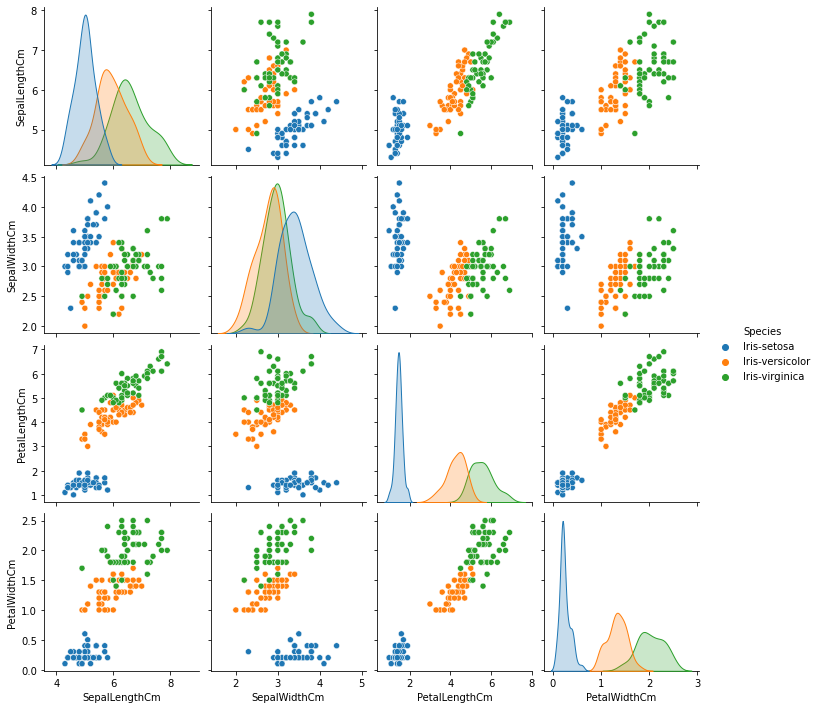

In [103]:
sns.pairplot(df, hue='Species')

### Nomralizing

In [104]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_trans=mms.fit_transform(df.iloc[:,:4])
df_trans=pd.DataFrame(df_trans,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_trans

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [105]:
df_convr=pd.merge(df_trans,df['Species'],how='left',left_index=True,right_index=True)
df_convr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


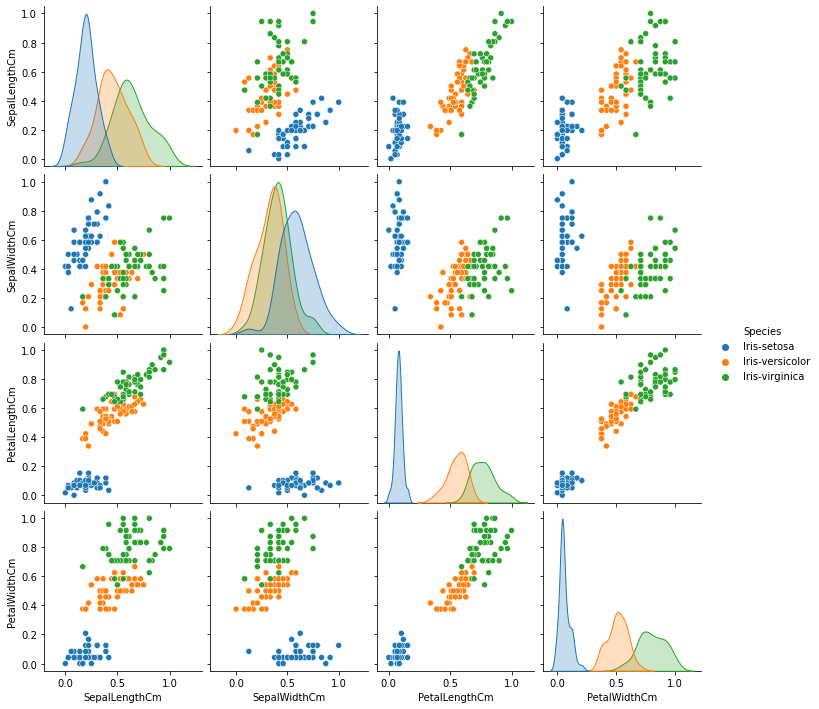

In [106]:
sns.pairplot(df_convr,hue='Species')

# Elbow method Implementation

In [107]:
from sklearn.cluster import KMeans
Sum_of_squared_distances=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df_trans)
    Sum_of_squared_distances.append(km.inertia_)
Sum_of_squared_distances

[41.13817202297779,
 12.143688281579719,
 6.9981140048267605,
 5.5328310030819,
 4.571180508755746,
 3.915088373862509,
 3.4624199873009642,
 3.1618070058054712,
 2.81473664747163,
 2.542664338775789,
 2.333638539810296,
 2.138613311059231,
 2.0577129817350137,
 1.8931038808825615]

## Graphical Representation

Text(0.5, 1.0, 'Elbow Method for Optimal k')

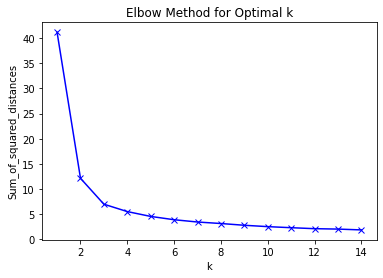

In [119]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')

In [109]:
###the optimum is 3 because elbow is at 3

In [110]:

###showing 3 clusters in a 2d feature graph and we w
##will be taking PetalLengthCm	PetalWidthCm
##because through pairplot we can see they are fit to distinguish 

## Confirming elbow method result with graphical representation

In [111]:
km=KMeans(n_clusters=3)
km.fit(df_convr.iloc[:,2:4])
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.7740113 , 0.81510417],
       [0.07864407, 0.06      ]])

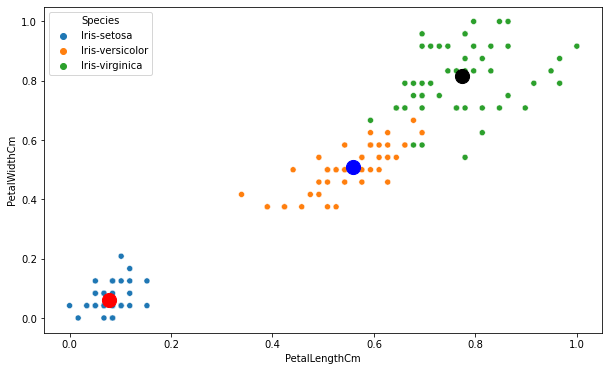

In [118]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_convr.iloc[:,2], y=df_convr.iloc[:,3],
              hue=df_convr["Species"])
plt.scatter(0.07864407, 0.06,s=200,c='r')
plt.scatter(0.55867014, 0.51041667,s=200,c='b')
plt.scatter(0.7740113 , 0.81510417,s=200,c='black')


### As we concluded using elbow method that we have 3 clusters, the same is proven when we plot the data taking hue as "Species"'